# <font color = "red"> What is Polynomial Regression

### <font color = 'blue'> In machine learning, A polynomial is a form of regression is a from of regression analysis in which the relationship between the independent variable X and the dependent variable Y is modeled as an nth degree polynomial in X 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('position_salaries.csv')
df.head(9)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000


In [3]:
x = df.iloc[:, 1: 2].values
y = df.iloc[:, 2].values


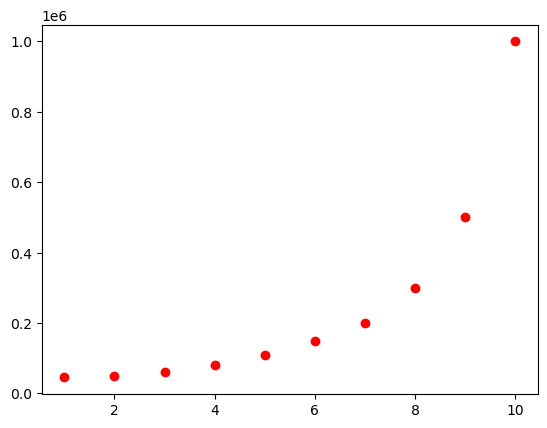

In [4]:
plt.scatter(x, y, color = 'red')
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


In [7]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

In [8]:
lin_reg = LinearRegression()

In [9]:
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [10]:
def viz_linear():
    plt.scatter(x, y, color = 'red')
    plt.plot(x, lin_reg.predict(x), color = 'Blue')
    plt.title("Truth or Bluff Linear Regression")
    plt.xlabel('Posistion salary')
    plt.ylabel('salary')
    plt.show()

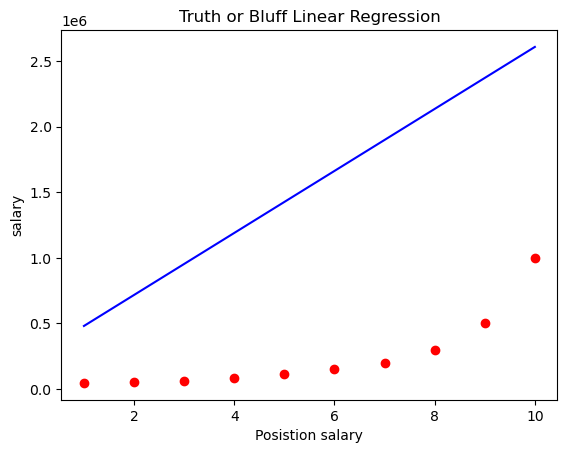

In [11]:
viz_linear()

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x)
pol_reg = LinearRegression()
pol_reg.fit(x_poly, y)

LinearRegression()

In [14]:
def viz_polynomial():
    plt.scatter(x, y, color = 'red')
    plt.plot(x, pol_reg.predict(poly_reg.fit_transform(x)), color = 'Blue')
    plt.title("Truth or Bluff Linear Regression")
    plt.xlabel('Posistion salary')
    plt.ylabel('salary')
    plt.show()

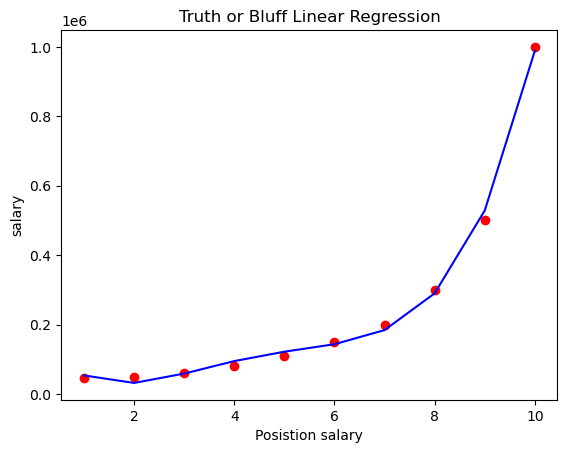

In [15]:
viz_polynomial()

In [16]:
# Checking of the result with linear regression
lin_reg.predict([[5.5]])

array([1544675.23124159])

In [17]:
# Checking of the result with polynomial Regression
pol_reg.predict(poly_reg.fit_transform([[5.5]]))

array([132148.43750007])

### Create a Data randomly and Visualize and do the operation of ploynomial regression 

In [18]:
X = 6 * np.random.rand(200, 1) - 3
Y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

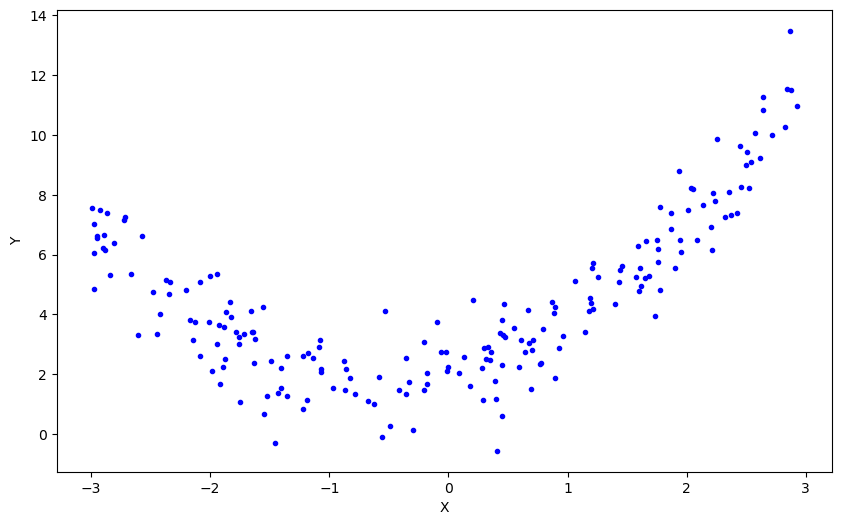

In [19]:
plt.figure(figsize = (10, 6))
plt.scatter(X, Y, marker = '.', color = 'blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)


In [21]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((160, 1), (40, 1), (160, 1), (40, 1))

In [22]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [23]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)

In [29]:
r2 = r2_score(Y_test, y_pred)

In [30]:
print(r2*100)

82.43983778759365


In [ ]:
plt.plot(X_train, model.predict(X_train), color = 'green')
plt.scatter(X, Y, marker = '.', color = 'red')
plt.show()

### Lets do the complete operation into the polynomial regression

In [25]:
poly = PolynomialFeatures(degree = 15, include_bias = True)
x_train = poly.fit_transform(X_train)
x_test = poly.transform(X_test)


In [26]:
model.fit(x_train, Y_train)

LinearRegression()

In [27]:
y_pred = model.predict(x_test)

In [28]:
score = r2_score(Y_test, y_pred)
print(score*100)

82.43983778759365


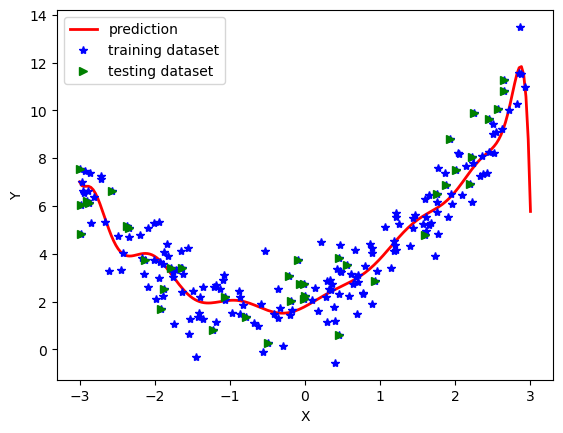

In [41]:
X_new = np.linspace( - 3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = model.predict(X_new_poly)
plt.plot(X_new, y_new, 'r-', linewidth = 2, label = 'prediction')
plt.plot(X, Y, 'b*', label = 'training dataset')
plt.plot(X_test, Y_test, 'g>', label = 'testing dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()